In [1]:
from IPython.display import clear_output
!pip install ultralytics ultralytics-hub
!pip install roboflow
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install opencv-python
clear_output()

In [2]:

from roboflow import Roboflow
rf = Roboflow(api_key="wGrQSC42QTpPwk44z31c")
project = rf.workspace("concealed-weapon-detection").project("thermal-pistol-jw5pm")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Thermal-pistol-1 in yolov11:: 100%|██████████| 336/336 [00:00<00:00, 6096.61it/s]


In [3]:
from ultralytics import YOLO

# Option 2: Load a pretrained model (recommended)
model = YOLO("yolo11n.pt")  # Ensure "yolo11n.pt" exists in your working directory

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]



image 1/1 /content/Thermal-pistol-1/test/images/0024_jpg.rf.9f7fac4588e9e28074e4b652448d7ebb.jpg: 640x640 (no detections), 12.5ms
Speed: 3.6ms preprocess, 12.5ms inference, 107.8ms postprocess per image at shape (1, 3, 640, 640)


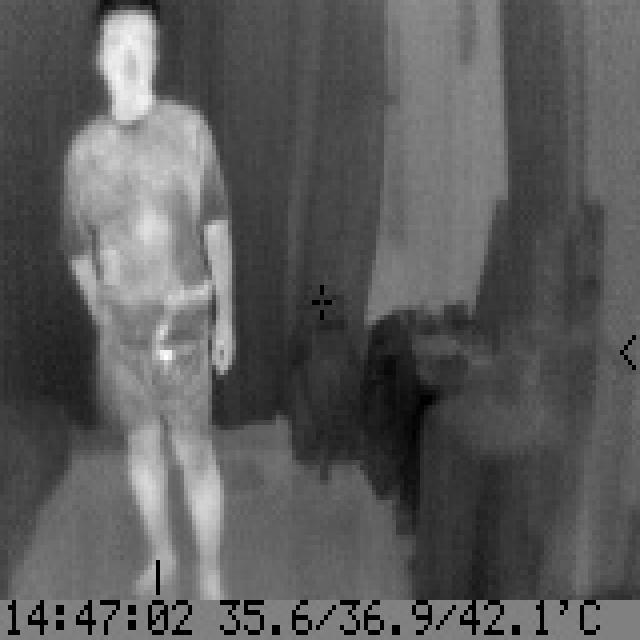

In [4]:
# Load an image (replace with your image path)
image_path = '/content/Thermal-pistol-1/test/images/0024_jpg.rf.9f7fac4588e9e28074e4b652448d7ebb.jpg'

# Run inference
results = model(image_path)

# Display results
results[0].show()  # Access the first element in the list and call .show()


image 1/1 /content/Thermal-pistol-1/test/images/0024_jpg.rf.9f7fac4588e9e28074e4b652448d7ebb.jpg: 640x640 (no detections), 8.2ms
Speed: 2.3ms preprocess, 8.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


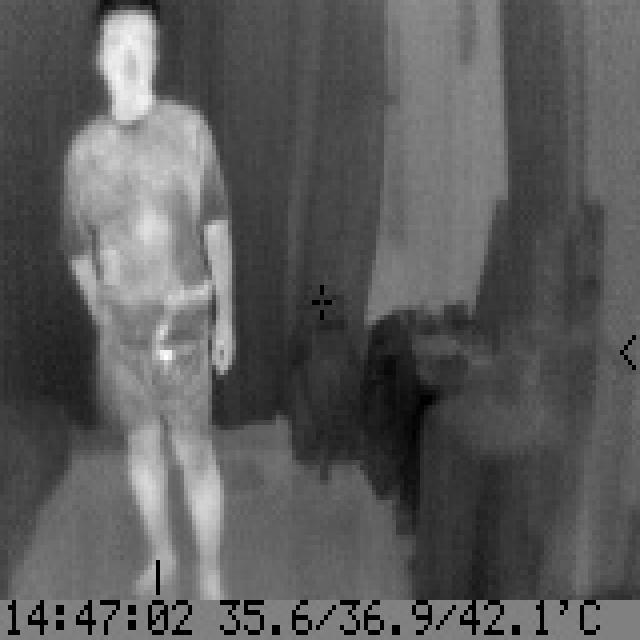

Classes: tensor([], device='cuda:0')
Confidences: tensor([], device='cuda:0')


In [5]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolo11n.pt")  # Replace with your model path

# Load an image (replace with your image path)
image_path = '/content/Thermal-pistol-1/test/images/0024_jpg.rf.9f7fac4588e9e28074e4b652448d7ebb.jpg'

# Run inference with a lower confidence threshold
results = model(image_path, conf=0.25)

# Display results
results[0].show()  # Show the image with detections

# Save the results
results[0].save('output_image.jpg')  # Save the output image

# Access detection details
for result in results:
    boxes = result.boxes  # Bounding boxes
    classes = boxes.cls  # Class IDs
    confidences = boxes.conf  # Confidence scores
    print("Classes:", classes)
    print("Confidences:", confidences)

In [6]:
from ultralytics import YOLO

# Load the pretrained model
model = YOLO("yolo11n.pt")  # Replace with the path to your pretrained model

# Fine-tune the model on your custom dataset
results = model.train(
    data="/content/Thermal-pistol-1/data.yaml",  # Path to your dataset configuration file
    epochs=100,                 # Number of training epochs
    imgsz=640,                  # Image size
    batch=16,                   # Batch size
    device=0,                   # Use GPU (set device=0 for GPU, device='cpu' for CPU)
    workers=2,                  # Number of data loading workers
    lr0=0.01,                   # Initial learning rate
    weight_decay=0.0005,        # Weight decay
    optimizer="SGD",            # Optimizer (SGD, Adam, etc.)
    name="yolo11n_finetuned"    # Name of the training run
)

# Validate the model on the validation set
metrics = model.val()  # Validate the model
print(metrics.box.map)  # Print mAP (mean Average Precision)

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Thermal-pistol-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=yolo11n_finetuned, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Thermal-pistol-1/train/labels... 114 images, 1 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 2489.76it/s]

train: New cache created: /content/Thermal-pistol-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Thermal-pistol-1/valid/labels... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<00:00, 1000.94it/s]

val: New cache created: /content/Thermal-pistol-1/valid/labels.cache


Plotting labels to runs/detect/yolo11n_finetuned/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11n_finetuned
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.38G      2.234       5.03      1.969          7        640: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         32         32   0.000833       0.25     0.0011    0.00024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.78G       1.93      4.985      1.807          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         32         32    0.00135      0.406   0.000975   0.000275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.78G      1.643      4.638      1.619          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         32         32    0.00115      0.344    0.00083   0.000337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.78G      1.697      3.972      1.487          3        640: 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         32         32    0.00208      0.625    0.00232   0.000861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.78G        1.4      3.828      1.433          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         32         32     0.0024      0.719    0.00302    0.00134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.78G       1.46      3.322       1.52          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         32         32    0.00313      0.938    0.00447    0.00189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.79G       1.39      3.027      1.427          5        640: 100%|██████████| 8/8 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         32         32    0.00313      0.938    0.00515    0.00328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.79G      1.252      2.787      1.349          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         32         32    0.00323      0.969      0.408       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.79G       1.37      2.616      1.396          2        640: 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         32         32    0.00323      0.969      0.332      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.79G      1.211      2.354      1.238          5        640: 100%|██████████| 8/8 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         32         32      0.541      0.438      0.364      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.79G      1.202      2.293      1.251          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         32         32      0.649     0.0938      0.257      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.79G      1.364       2.15      1.306          5        640: 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         32         32      0.591      0.091       0.24      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.79G      1.372      2.318      1.278          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         32         32      0.394      0.281      0.241      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.79G      1.478       2.03      1.442          2        640: 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         32         32      0.556      0.531      0.436       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.79G      1.223      1.856      1.215          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         32         32      0.366      0.344      0.284      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.79G       1.26      1.866       1.28          5        640: 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         32         32     0.0838      0.156     0.0911     0.0566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.79G      1.209      1.937      1.255          4        640: 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         32         32     0.0453      0.219     0.0366     0.0193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.79G      1.209      1.852      1.206          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         32         32      0.509      0.594      0.572      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.79G      1.264      1.672      1.226          7        640: 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         32         32      0.237      0.344      0.201       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.79G      1.237       1.96       1.27          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         32         32      0.509        0.5      0.482      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.79G       1.12      1.581      1.204          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         32         32      0.605      0.573      0.573      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.79G      1.061      1.673      1.117          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         32         32     0.0941      0.188     0.0522      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.79G      1.156      1.527      1.154          5        640: 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         32         32      0.701       0.66      0.729      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.79G      1.123      1.572       1.17          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         32         32      0.928      0.803      0.909      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.79G      1.088      1.606       1.17          2        640: 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         32         32      0.983      0.844      0.928      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.79G      1.259      1.689      1.269          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         32         32      0.721      0.688      0.764      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.79G      1.186      1.418      1.182          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         32         32      0.375      0.438      0.402      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.79G      1.163      1.411      1.233          3        640: 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         32         32      0.811      0.812      0.858      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.79G      1.088      1.307      1.157          5        640: 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         32         32      0.855      0.625      0.797      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.79G      1.072      1.252      1.129          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         32         32      0.523      0.344      0.313      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.79G      1.086      1.356      1.134          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         32         32      0.752      0.656      0.685      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.79G      1.095      1.222      1.183          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         32         32      0.457      0.395      0.338       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.79G      1.131       1.22      1.114          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         32         32      0.513      0.594      0.512      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.79G      1.083      1.181      1.135          5        640: 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         32         32      0.586      0.663      0.631      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.79G      1.048      1.273      1.116          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         32         32      0.364      0.469      0.248      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.79G      1.034       1.01       1.09          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         32         32      0.789       0.75      0.769       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.79G      1.077      1.241      1.148          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         32         32        0.9       0.84      0.865      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.79G     0.9536      1.012      1.065          4        640: 100%|██████████| 8/8 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         32         32      0.802      0.875      0.882      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.79G      1.158      1.325      1.205          2        640: 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         32         32      0.342      0.281      0.269      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.79G      1.032      1.026        1.1          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         32         32      0.483      0.594      0.424      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.79G      1.034      1.201      1.141          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         32         32       0.47      0.375      0.429      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.79G      1.101        1.1      1.131          5        640: 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         32         32      0.357      0.438      0.231      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.79G     0.9285       1.11      1.101          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         32         32      0.637      0.781      0.754      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.79G      1.003      1.012      1.107          2        640: 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         32         32      0.807      0.786      0.861      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.79G      0.991      1.001      1.083          2        640: 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         32         32      0.676      0.562      0.609      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.79G       1.01      1.072      1.117          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         32         32      0.674      0.844        0.8      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.79G     0.9249      1.025      1.052          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         32         32      0.735      0.625      0.648      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.79G     0.9406       1.02       1.07          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         32         32      0.895      0.844      0.911      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.79G      0.889     0.9093      1.017          5        640: 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         32         32      0.559      0.469      0.497      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.79G     0.8773      0.941      1.025          2        640: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         32         32      0.808      0.812      0.873      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.79G     0.9156      0.902      1.054          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         32         32      0.844      0.812      0.894      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.79G     0.8825     0.9108      1.045          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         32         32      0.919      0.906      0.936      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.79G     0.9614     0.9254      1.037          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         32         32      0.869      0.831      0.894      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.79G     0.9195      1.077      1.051          2        640: 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         32         32      0.918      0.906      0.936      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.79G     0.8861     0.8836      1.053          4        640: 100%|██████████| 8/8 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         32         32      0.935      0.899      0.964      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.79G      0.893      0.886      1.027          8        640: 100%|██████████| 8/8 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         32         32      0.814      0.959      0.962      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.79G     0.9426     0.9393       1.05          5        640: 100%|██████████| 8/8 [00:01<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         32         32      0.971       0.75      0.908      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.79G     0.8667     0.8476       1.01          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         32         32      0.911      0.961      0.953       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.79G     0.8576      0.793      1.013          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         32         32      0.911      0.954      0.982      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.79G     0.8313     0.7699     0.9975          3        640: 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         32         32      0.863      0.812      0.907      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.79G     0.8728     0.8071      1.033          5        640: 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         32         32      0.933      0.719      0.879      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.79G     0.9506     0.8277      1.062          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         32         32      0.967      0.904      0.961      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.79G     0.9118     0.8342      1.044          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         32         32      0.891      0.875      0.935      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.79G     0.8061     0.8389      1.011          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         32         32      0.961      0.779      0.893      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.79G     0.8715     0.8032     0.9981          3        640: 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         32         32       0.94      0.972      0.977      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.79G     0.7108      1.022     0.8622          0        640: 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         32         32      0.799      0.743       0.84      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.79G     0.9193     0.8951      1.042          6        640: 100%|██████████| 8/8 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         32         32      0.966      0.901      0.964      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.79G     0.8455     0.7093     0.9987          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         32         32      0.968      0.931      0.987      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.79G       0.84       0.78      1.018          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         32         32      0.872      0.969      0.959      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.79G     0.8889     0.7923      1.026          4        640: 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         32         32      0.657       0.72      0.745      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.79G     0.8097     0.7375          1          4        640: 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         32         32      0.927      0.844      0.945      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.79G     0.8476     0.7465      1.022          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         32         32      0.883      0.947      0.982      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.79G     0.8963     0.7651      1.019          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         32         32      0.964      0.969      0.988      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.79G     0.8442      0.762      1.021          5        640: 100%|██████████| 8/8 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         32         32          1      0.993      0.995      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.79G     0.8359     0.8669      1.021          3        640: 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         32         32      0.911          1      0.986      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.79G     0.7949     0.7323     0.9918          6        640: 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         32         32      0.937      0.937      0.977      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.79G     0.8216     0.7528       1.06          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         32         32      0.969      0.962      0.991      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.79G     0.7455     0.7239     0.9892          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         32         32      0.941      0.994      0.985      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.79G     0.7404     0.6707     0.9579          8        640: 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         32         32      0.997          1      0.995      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.79G     0.7762     0.6693     0.9744          6        640: 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         32         32      0.961          1      0.994      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.79G     0.7067     0.6541     0.9781          3        640: 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         32         32      0.937          1      0.991      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.79G     0.7305     0.7242     0.9899          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         32         32      0.904      0.906       0.97       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.79G     0.7489     0.8253     0.9664          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         32         32      0.926      0.844      0.929      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.79G      0.683     0.6576     0.9224          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         32         32      0.906      0.903      0.955      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.79G     0.6617     0.6438     0.9099          2        640: 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         32         32      0.909      0.934      0.944      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.79G     0.6881      0.625     0.9377          6        640: 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         32         32      0.967       0.93      0.954      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.79G     0.7292     0.6616     0.9699          3        640: 100%|██████████| 8/8 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         32         32      0.941      0.999      0.992      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.79G     0.7124     0.6379     0.9719          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         32         32       0.99      0.969      0.993      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.79G     0.6979     0.6166     0.9242          6        640: 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         32         32          1      0.959      0.992      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.79G     0.7054     0.6278     0.9596          7        640: 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         32         32      0.988      0.938      0.989      0.708


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.79G     0.5852     0.5488      0.905          2        640: 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         32         32      0.963      0.906      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.79G     0.6569     0.5684     0.9018          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         32         32          1      0.968      0.993      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.79G     0.6187     0.6104     0.8988          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         32         32          1      0.994      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.79G     0.5904     0.5398     0.8959          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         32         32      0.965      0.969      0.991      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.79G     0.5899     0.5024     0.8694          2        640: 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         32         32      0.939      0.967      0.987      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.79G     0.6404     0.5188     0.8978          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         32         32      0.939      0.965      0.986      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.79G     0.5658      0.508     0.8764          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         32         32      0.938      0.969      0.988      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.79G     0.5508     0.5026      0.849          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         32         32      0.939      0.963      0.986      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.79G     0.6365     0.5559     0.9087          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         32         32      0.911      0.964      0.983      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.79G       0.54     0.5002     0.8761          2        640: 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         32         32      0.968      0.969      0.987       0.71



100 epochs completed in 0.073 hours.
Optimizer stripped from runs/detect/yolo11n_finetuned/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11n_finetuned/weights/best.pt, 5.5MB

Validating runs/detect/yolo11n_finetuned/weights/best.pt...
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


                   all         32         32      0.995          1      0.995      0.731
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/yolo11n_finetuned
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/Thermal-pistol-1/valid/labels.cache... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]


                   all         32         32      0.995          1      0.995      0.736
Speed: 5.9ms preprocess, 9.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/yolo11n_finetuned2
0.7364563072819064



image 1/1 /content/Thermal-pistol-1/test/images/0024_jpg.rf.9f7fac4588e9e28074e4b652448d7ebb.jpg: 640x640 1 Gun, 19.1ms
Speed: 2.6ms preprocess, 19.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


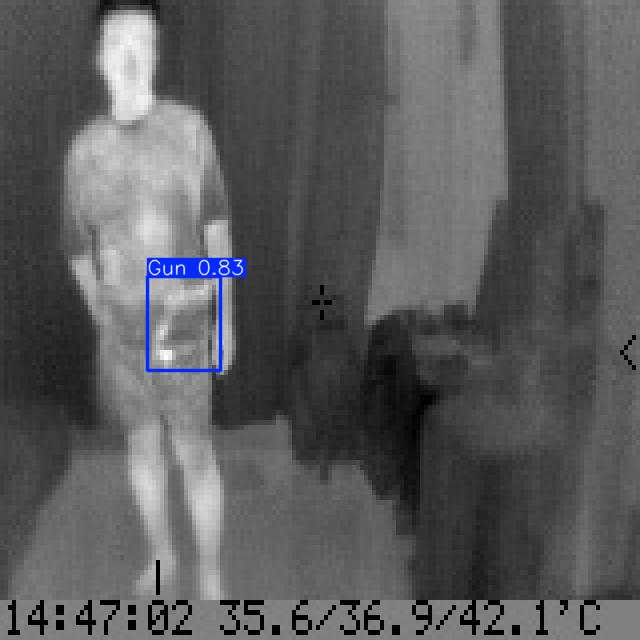

In [7]:
# Test on an image
results = model("/content/Thermal-pistol-1/test/images/0024_jpg.rf.9f7fac4588e9e28074e4b652448d7ebb.jpg")
results[0].show()  # Display the results


In [8]:
from google.colab import files
files.download("/content/runs/detect/yolo11n_finetuned/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import os
import time
from ultralytics import YOLO

# Load the fine-tuned model
model = YOLO("/content/runs/detect/yolo11n_finetuned/weights/best.pt")  # Replace with your fine-tuned model path

# Directory containing test images
test_images_dir = "/content/Thermal-pistol-1/test/images"

# Iterate through all images in the directory
for image_name in os.listdir(test_images_dir):
    # Construct the full path to the image
    image_path = os.path.join(test_images_dir, image_name)

    # Run inference on the image
    results = model(image_path)

    # Display the results
    results[0].show()  # Show the image with detections

    # Add a delay (e.g., 5 seconds)
    time.sleep(5)  # Adjust the delay time as needed

Output hidden; open in https://colab.research.google.com to view.

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/Thermal-pistol-1/test/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


                   all         16         16          1      0.996      0.995      0.728
Speed: 0.2ms preprocess, 5.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val2
mAP50-95: 0.7281
Precision: 1.0000
Recall: 0.9964
F1 Score: 0.9982


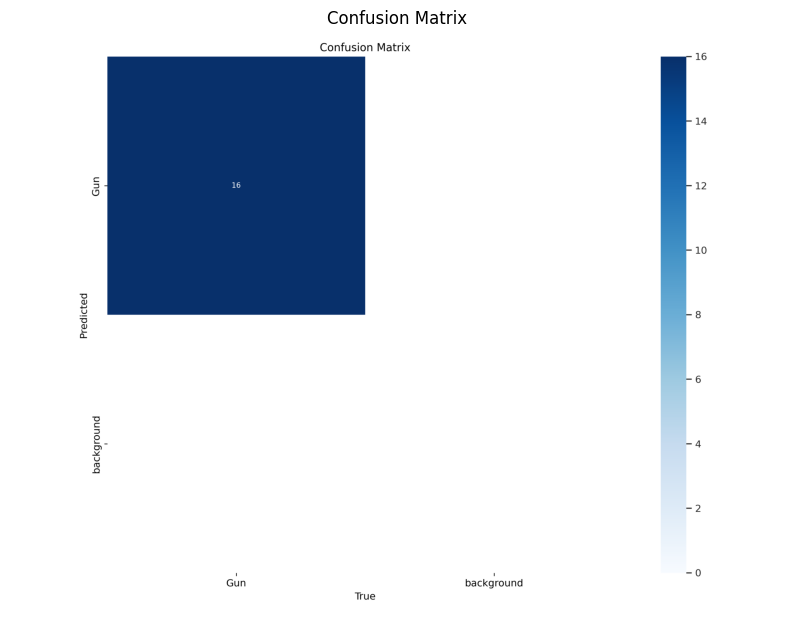

In [11]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load trained model
model = YOLO('/content/runs/detect/yolo11n_finetuned/weights/best.pt')

# Validate model
metrics = model.val(
    data='/content/Thermal-pistol-1/data.yaml',
    split='test',  # Use test split for final evaluation
    plots=True
)

# Print key metrics
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")
print(f"F1 Score: {2 * (metrics.box.mp * metrics.box.mr) / (metrics.box.mp + metrics.box.mr):.4f}")

# Plot confusion matrix
confusion_matrix = plt.imread('/content/runs/detect/val/confusion_matrix.png')
plt.figure(figsize=(10, 8))
plt.imshow(confusion_matrix)
plt.axis('off')
plt.title('Confusion Matrix')
plt.show()

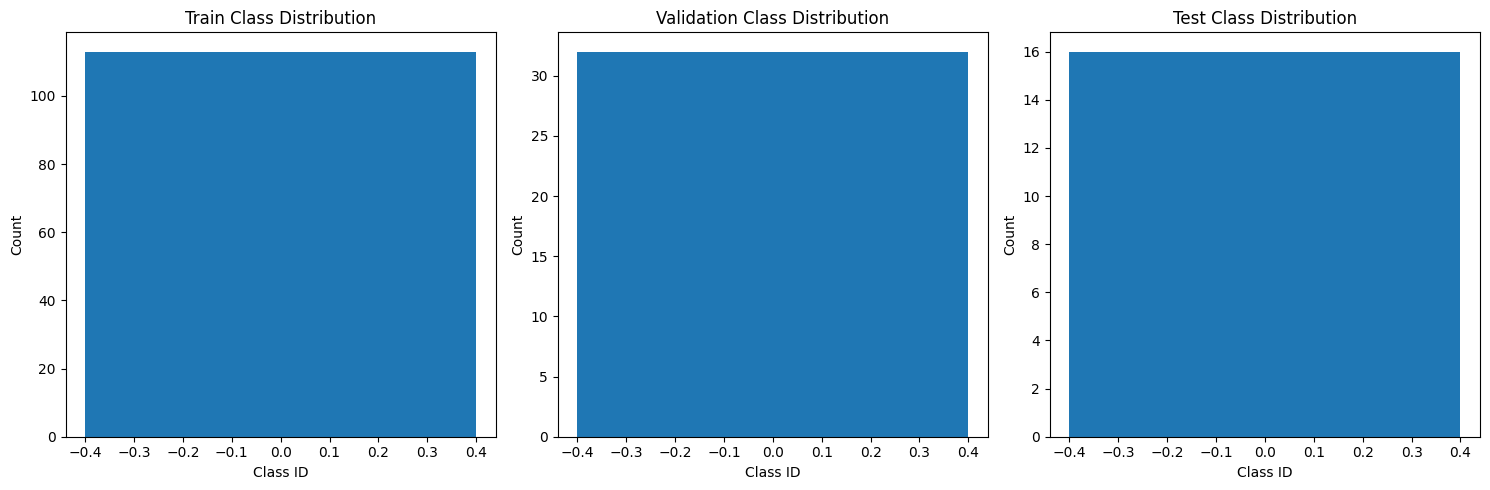

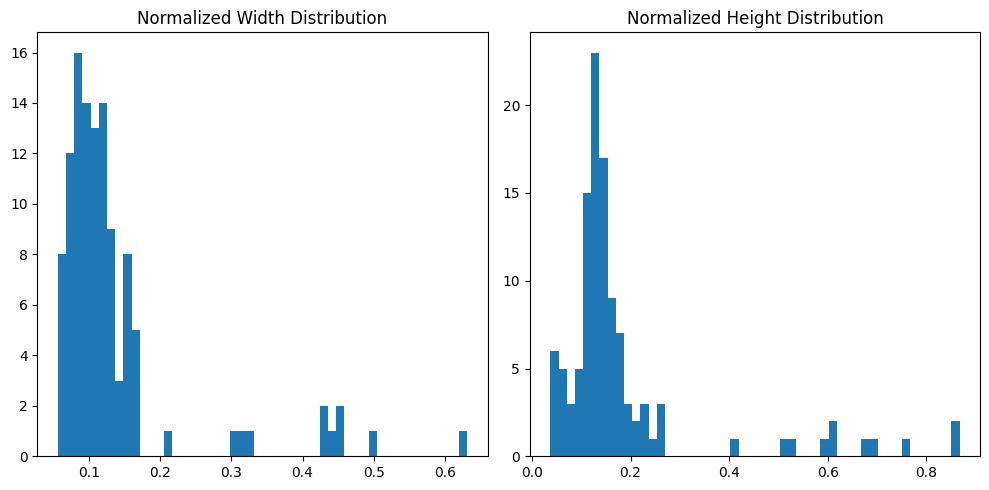

Exception in thread Thread-58 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py", line 1092, in plot_images
    bs, _, h, w = images.shape  # batch size, _, height, width
                  ^^^^^^^^^^^^
AttributeError: 'list' object has no attribute 'shape'


<Thread(Thread-58 (plot_images), started daemon 139775801546304)>

In [14]:
import yaml
import cv2
import numpy as np
from PIL import Image
from ultralytics.utils.plotting import plot_images

# Load dataset config
with open('/content/Thermal-pistol-1/data.yaml') as f:
    data = yaml.safe_load(f)

# Class distribution visualization
class_counts = []
for split in ['train', 'valid', 'test']:
    label_dir = f'/content/Thermal-pistol-1/{split}/labels'
    counts = np.zeros(data['nc'])
    for label_file in os.listdir(label_dir):
        with open(os.path.join(label_dir, label_file)) as f:
            for line in f:
                class_id = int(line.split()[0])
                counts[class_id] += 1
    class_counts.append(counts)

plt.figure(figsize=(15, 5))
for i, split in enumerate(['Train', 'Validation', 'Test']):
    plt.subplot(1, 3, i+1)
    plt.bar(range(data['nc']), class_counts[i])
    plt.title(f'{split} Class Distribution')
    plt.xlabel('Class ID')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bounding box size distribution
box_sizes = []
for split in ['train']:
    label_dir = f'/content/Thermal-pistol-1/{split}/labels'
    for label_file in os.listdir(label_dir):
        with open(os.path.join(label_dir, label_file)) as f:
            for line in f:
                _, x, y, w, h = map(float, line.split())
                box_sizes.append((w, h))

w, h = zip(*box_sizes)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(w, bins=50)
plt.title('Normalized Width Distribution')
plt.subplot(1, 2, 2)
plt.hist(h, bins=50)
plt.title('Normalized Height Distribution')
plt.tight_layout()
plt.show()

# Sample training images with labels
sample_images = [os.path.join('/content/Thermal-pistol-1/train/images', f)
                for f in os.listdir('/content/Thermal-pistol-1/train/images')[:4]]
plot_images([cv2.imread(img) for img in sample_images],
           [Image.open(img).size for img in sample_images],
           data['names'])

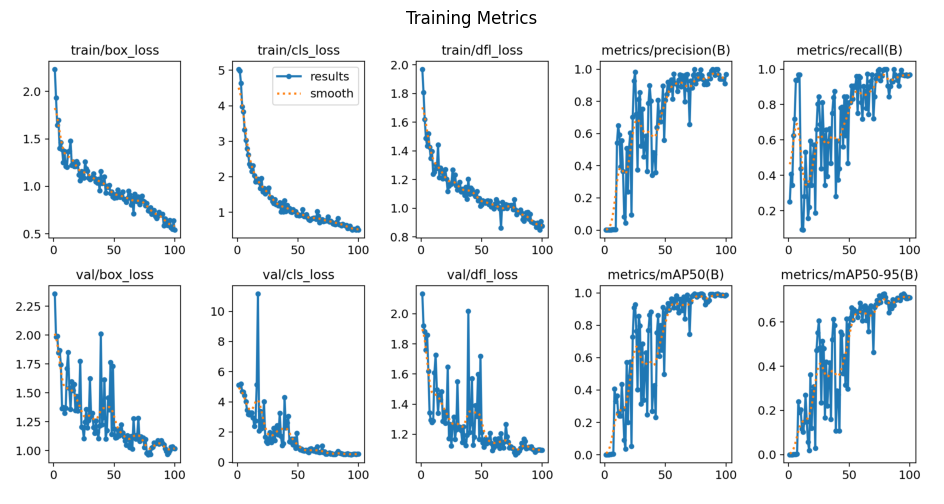


image 1/1 /content/Thermal-pistol-1/test/images/0180_jpg.rf.fe6c9411ba9a348af086cb48fb33cb83.jpg: 640x640 (no detections), 12.4ms
Speed: 2.3ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Thermal-pistol-1/test/images/0099_jpg.rf.ab7545c63e80fa298bfdd0568e3c142b.jpg: 640x640 1 Gun, 8.8ms
Speed: 2.6ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Thermal-pistol-1/test/images/0148_jpg.rf.ed523f48486898755cb12cbfa162f643.jpg: 640x640 1 Gun, 8.9ms
Speed: 2.8ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Thermal-pistol-1/test/images/0210_jpg.rf.3f588deba76b7c7291470dd0eb66113e.jpg: 640x640 1 Gun, 10.5ms
Speed: 2.6ms preprocess, 10.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Thermal-pistol-1/test/images/0076_jpg.rf.12791cd1f0e751a02687a317c7bdce55.jpg: 640x640 1 Gun, 8.8ms
Sp

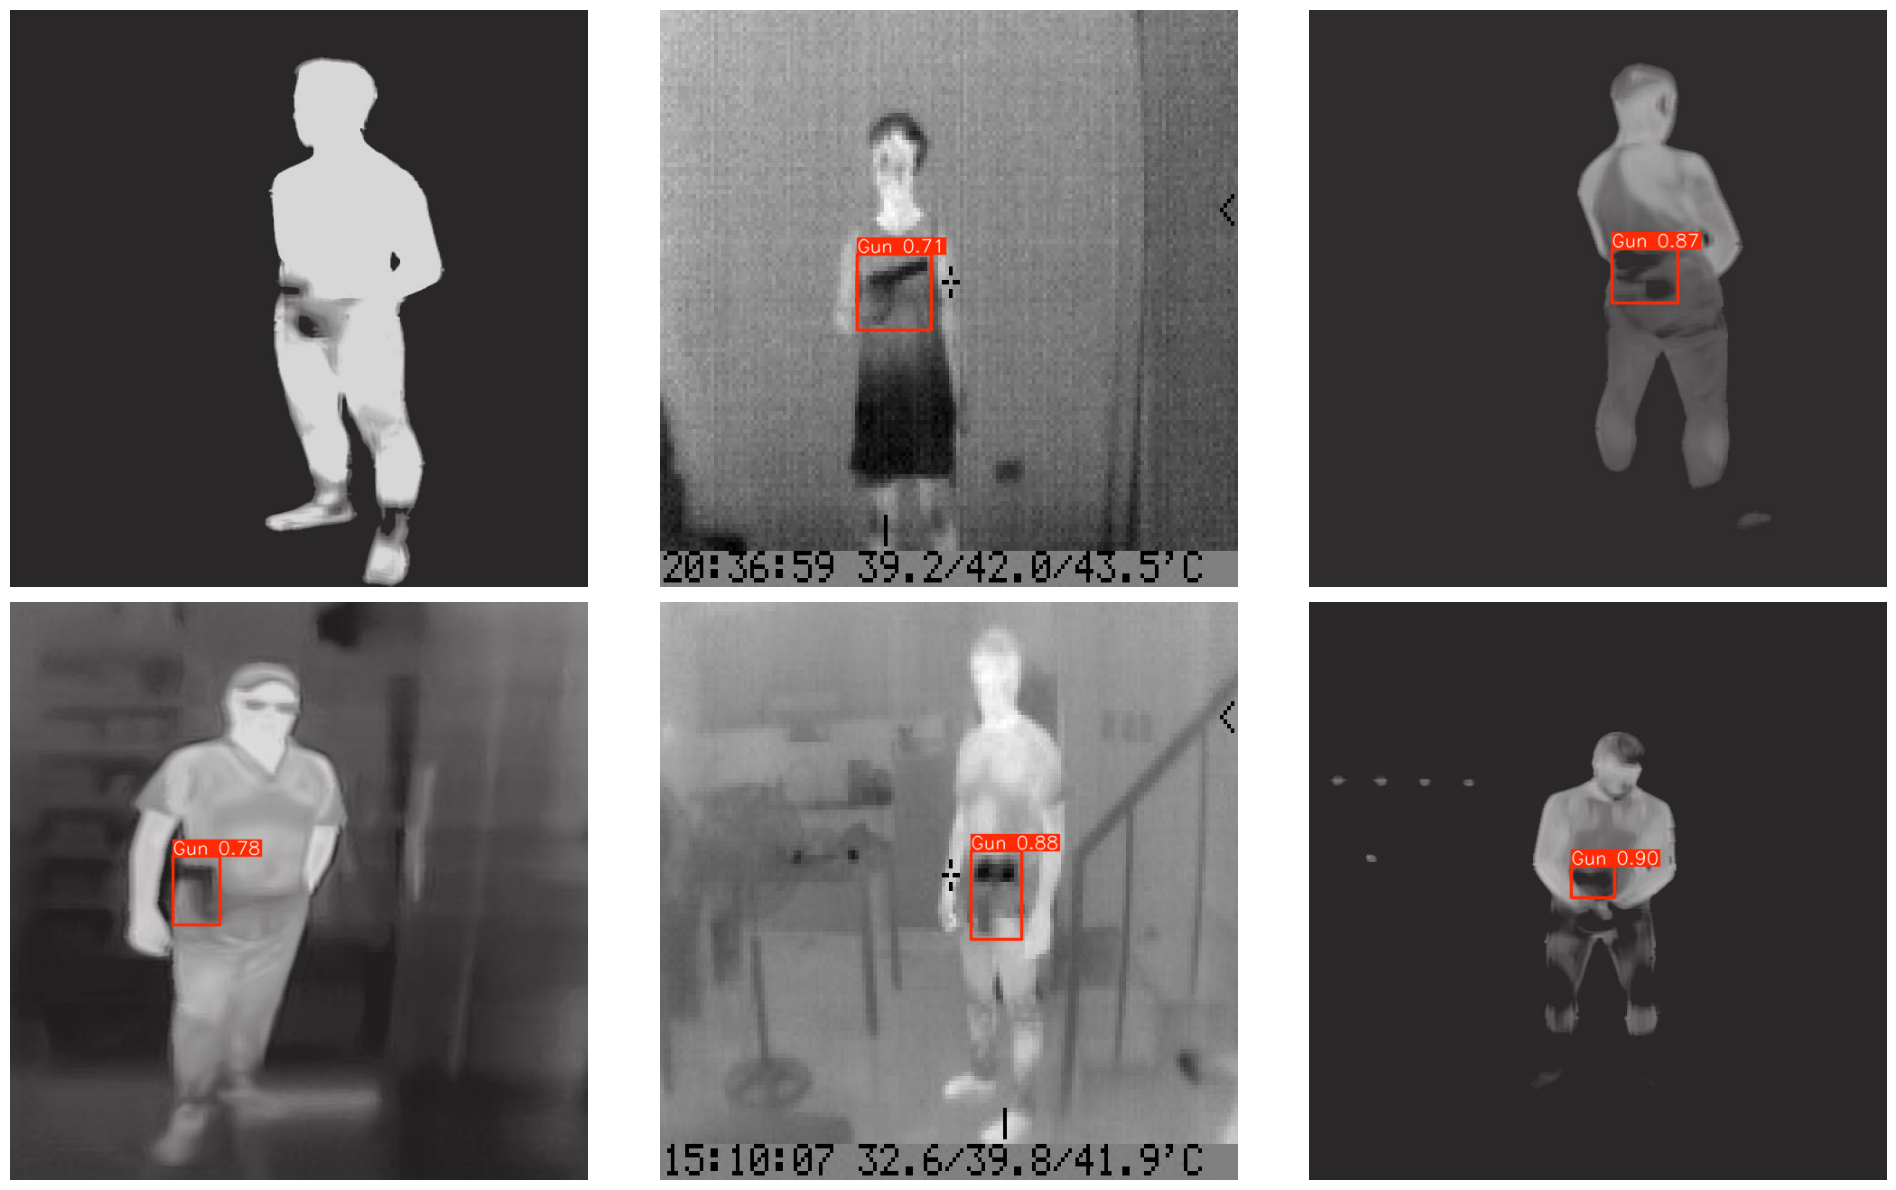

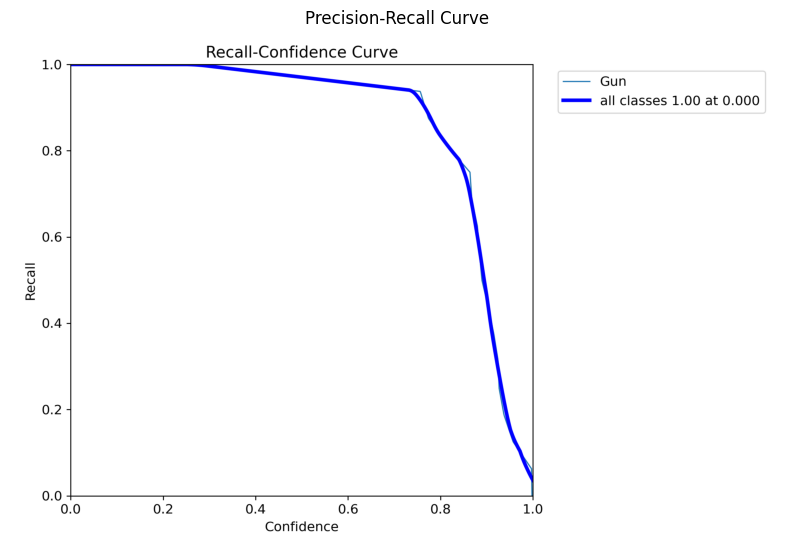

In [16]:
# Training metrics visualization
training_metrics = plt.imread('/content/runs/detect/yolo11n_finetuned/results.png')
plt.figure(figsize=(12, 6))
plt.imshow(training_metrics)
plt.axis('off')
plt.title('Training Metrics')
plt.show()

# Prediction visualization on test set
test_images = [os.path.join('/content/Thermal-pistol-1/test/images', f)
              for f in os.listdir('/content/Thermal-pistol-1/test/images')[:6]]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for ax, img_path in zip(axes.flat, test_images):
    results = model(img_path)
    ax.imshow(results[0].plot())
    ax.axis('off')
plt.tight_layout()
plt.show()

# Precision-Recall curve
pr_curve = plt.imread('/content/runs/detect/val/R_curve.png')
plt.figure(figsize=(10, 8))
plt.imshow(pr_curve)
plt.axis('off')
plt.title('Precision-Recall Curve')
plt.show()